**Parcial 3_ 1152225738**

Determine el espacio de configuraciones, en los ejes $(\omega, x)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.

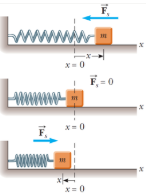

The equation of motion is:

$\ddot{x}(t) = -\omega^2 x(t)$


con frecuencia natural:
*texto en cursiva*
$\omega^2 =k/m$ 

In [1]:
import numpy as np
from scipy import integrate, optimize
import matplotlib.pyplot as plt



In [8]:
# lo primero es definir la funcion a trabajar, para luego solucionar la Ec. diferencial

def f(x0_v0, t, m_k):

  m,k=m_k
  x0,v0=x0_v0 
  ω=k/m
# nuestra escuacion de movimiento esta dada por

  X =  (-1)*ω * x0

  return [v0, X]

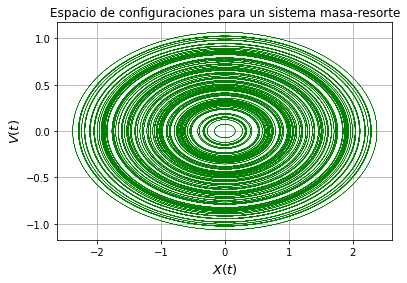

In [143]:
# definición de constantes
n = 1000          
k = 1           # constante elástica [N/m]
m = 0.2           # masa [kg]
g = 0           # gravedad [m/s²]
x0 = np.random.uniform(0,1, 100) #condicion inicial de x
v0 = np.random.uniform(0,1, 100) #condicion inicial de v

t = np.linspace(0,30,n)

# cálculo de x0,v0 en las distintas condiciones iniciales:

for x, v in zip(x0, v0): #El método zip continúa hasta el iterable más corto en la secuencia de argumentos se agota y luego genera StopIteration.

  x0_v0= [x, v]
  m_k = [m , k]

# solución de la ecuacione diferencial: con condiciones iniciales
  u = integrate.odeint(f, x0_v0, t, args = (m_k, ))
  plt.plot(u[:,1],u[:,0],color='g',lw=0.1)
plt.title('Espacio de configuraciones para un sistema masa-resorte')
plt.xlabel('$X(t)$',size=13)
plt.ylabel('$V(t)$',size=13)
plt.grid()

plt.show()

In [23]:
u

array([[ 0.54579334,  0.42493185],
       [ 0.55731444,  0.34208484],
       [ 0.56632354,  0.25769592],
       ...,
       [-0.4638183 ,  0.7709633 ],
       [-0.43963836,  0.83881588],
       [-0.41347682,  0.90288764]])

2) Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [37]:
# debemos importar en un pandas los datos del archivo
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [39]:
df.rename(columns={"t":"t","N(t)":"N"},inplace=True)
df

,t,N
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


Las condiciones iniciales son: 

In [155]:
N = df.iloc[:,1]
t = df.t

In [172]:

from scipy.optimize import curve_fit
def f_(t_, r):
  N_0 = 1000 #Nucleos iniciales
  return N_0 * np.exp(-r*t_)

#Fit
r = 𝜆[0]
t_ = np.linspace(0, 200, 100)
𝜆, b = curve_fit(f_, df.t[1:], df.N[1:] )

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [173]:
#vida media en años
𝜏 = np.log(2)/𝜆
𝜏

array([27.9916415])

In [174]:
#el error para 𝜆
l_ = np.sqrt(b)
l_

array([[0.00037163]])

In [175]:
#error del fit al calular vida media
error= np.sqrt(np.diag((b)/l))
error


array([0.00236162])

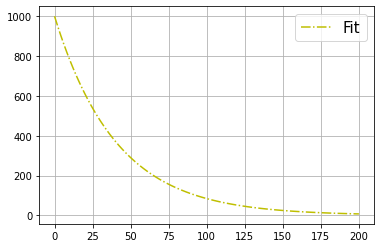

In [176]:
plt.plot(t_, fit(t_, r), 'y-.', label = 'Fit')
plt.legend(fontsize = 15)
plt.grid()

In [178]:
N_ajuste=f_(df.t,*𝜆)
df["N_ajuste"]= f_(df.t,*𝜆)
df

,t,N,N_ajuste
0,0,1000,1000.000000
1,10,809,780.651474
2,22,564,579.970367
3,33,480,441.680989
4,40,370,371.388742
5,50,285,289.925169
6,60,199,226.330510
7,70,169,176.685246
8,80,131,137.929598
9,99,101,86.164053


No handles with labels found to put in legend.


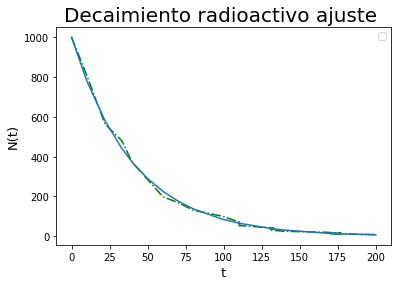

In [180]:
# Grafique los datos como puntos en el plano  𝑡 ,  𝑁  y el correspondiente al fit
plt.plot(df.t,df.N, "g-.")
plt.plot(df.t,df.N_ajuste)
plt.title('Decaimiento radioactivo ajuste ',fontsize = 20)
plt.xlabel('t',fontsize = 13)
plt.ylabel('N(t)',fontsize = 13)
plt.legend()
plt.show()